# Importing datasets

In [ ]:
!pip install pandas


     |################################| 9.5 MB 30.2 MB/s eta 0:00:01
     |################################| 503 kB 25.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
!pip install matplotlib

In [ ]:
#Importing the relevant libraries
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Importing English tweets 
eng_twts_1 = pd.read_csv('English Data/labeled_data.csv')
eng_twts_2 = pd.read_csv('English Data/data (2).csv', header = None)

#Importing Malay Wikipedia comments 
malay_com_1 = pd.read_csv('Malay Data/convertcsv (1).csv')
malay_com_2 = pd.read_csv('Malay Data/convertcsv (2).csv')
malay_com_3 = pd.read_csv('Malay Data/convertcsv (3).csv')
malay_com_4 = pd.read_csv('Malay Data/convertcsv (4).csv')
malay_com_5 = pd.read_csv('Malay Data/convertcsv (5).csv')
malay_com_6 = pd.read_csv('Malay Data/convertcsv (6).csv')
malay_com_7 = pd.read_csv('Malay Data/convertcsv (7).csv')
malay_com_8 = pd.read_csv('Malay Data/convertcsv.csv')


## Preparing English dataset

In [ ]:
#Sub-setting the necessary columns
eng_ds_1 = eng_twts_1.iloc[:, 5:7]

#Assimilating the "offensive" and "neither" categories
conditions = (eng_ds_1['class'] == 2),(eng_ds_1['class'] == 1)
choices = 0,0

eng_ds_1['class'] = np.select(conditions, choices, default = 1)

#Rearranging the order of the columns
eng_ds_1 = eng_ds_1[['tweet','class']]

eng_ds_1

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,0
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,0
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,0
...,...,...
24778,"you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8230;. Now, mine? Bible scriptures and hymns&#8221;",0
24779,"you've gone and broke the wrong heart baby, and drove me redneck crazy",0
24780,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again,0
24781,youu got wild bitches tellin you lies,0


In [ ]:
#Display the class count in first English dataset
eng_ds_1['class'].value_counts()

0    23353
1     1430
Name: class, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

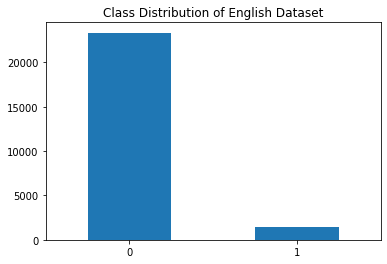

In [ ]:
#Plotting class distribution of English dataset
eng_ds_1['class'].value_counts().plot.bar()
plt.title("Class Distribution of English Dataset")
plt.xticks(rotation = 360)

In [ ]:
#Display the percentage class count in first English dataset
eng_ds_1['class'].value_counts(normalize = True)*100

0    94.229916
1     5.770084
Name: class, dtype: float64

In [ ]:
#Adding 'Class' column to second English dataset 
eng_twts_2['class'] = 1

#Subsetting the necessary columns in second English dataset
eng_ds_2 = eng_twts_2.iloc[:,1:3]

#Renaming the column of second English dataset
eng_ds_2 = eng_ds_2.rename(columns = {1 : 'tweet'})

eng_ds_2


,tweet,class
0,@Holdup_ImMikey lmao forgot you a boojie hood nigga but it's different ways to handle it didn't have to kick the bitch,1
1,@NVervynck you gave me them boojie ass balls,1
2,@Forbes Hahahaha middle aged rednecks crying to Trumpet vise versa. F250 PUs and beer and ammo ate up your $. No Chinaman took it LMFAO !!!,1
3,@ForEverRiah @yafavvwhitegirl lol so you saying I look like a damn hillbilly bumpkin 😂😂😂😡🤔🤔🤔,1
4,"@NBCSN you suck, I hope Bernie terminates your F1 contract. Bullshit hillbilly ""racing""",1
...,...,...
10083,@parkourboy_123 bro take it down u are just a fake ass friend and an ungrateful piece of shit u should be thank faggot,1
10084,"@ARitzka @reverbrony @ObabScribbler @StarryFlame everytime you suck a dick, you look like a faggot. Go figure :P",1
10085,@kessner_tara this is my pic u faggot,1
10086,@imreallyjai we need you in chat you dirty faggot. IT'S THE NUTSHACK,1


In [ ]:
#Combining both the English datasets
eng_ds = eng_ds_1.append(eng_ds_2)

#Displaying total observations of final English dataset
eng_ds.count()

tweet    34871
class    34871
dtype: int64

In [ ]:
#Display class count of final English dataset
eng_ds['class'].value_counts()

0    23353
1    11518
Name: class, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

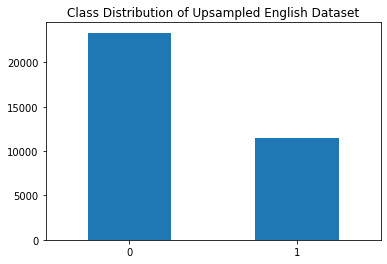

In [ ]:
#Plotting class distribution of upsampled English dataset
eng_ds['class'].value_counts().plot.bar()
plt.title("Class Distribution of Upsampled English Dataset")
plt.xticks(rotation = 360)

In [ ]:
#Display percentage class count of final English dataset
eng_ds['class'].value_counts(normalize = True)*100

0    66.969688
1    33.030312
Name: class, dtype: float64

In [ ]:
#Check for missing values
eng_ds.isna().sum()

tweet    0
class    0
dtype: int64

## Preparing Malay dataset

In [ ]:
#Append Malay Wikipedia comments

malay_ds = malay_com_1.append((malay_com_2,
                               malay_com_3,
                               malay_com_4,
                               malay_com_5,
                               malay_com_6,
                               malay_com_7,
                               malay_com_8))

malay_ds

,0,1/0,1/1,1/2,1/3,1/4,1/5
0,cocksucker sebelum anda kencing di atas kerja saya,1,1,1,0,1,0
1,"Anda, tuan, adalah wira saya. ada peluang anda ingat apa halaman yang ada",0,0,0,0,0,0
2,"tahniah dari saya juga, gunakan alat dengan baik. bercakap",0,0,0,0,0,0
3,penjajaran mengenai subjek ini dan yang bertentangan dengan orang-orang dulithgow,0,0,0,0,0,0
4,"d'aww! dia sepadan dengan warna latar belakang saya seolah-olah terperangkap dengan. terima kasih. bercakap, januari, utc",0,0,0,0,0,0
...,...,...,...,...,...,...,...
17906,"banjir! kota itu tenggelam! Berikut adalah beberapa pics yang besar kereta parade ucc terapung! mahkamah daerah kegemaran peribadi saya. kebanyakan bekalan air telah tercemar, dan penjaga itu akan habis dalam masa terdekat! hospital peminjam dan hotel kingsley terpaksa dipindahkan pada awal pagi. di sini adalah ringkasan ringkas pengisytiharan peristiwa. iaitu.",0,0,0,0,0,0
17907,"iso suntikan rasionalitas yang tenang. dengan pemahaman yang sangat baik mengenai dasar dan garis panduan rasmi wikipedia, dan ditambah pula dengan rekod jejak anda untuk menyuntikkan rasionalitas yang tenang ke dalam perbincangan yang hangat, saya tertanya-tanya jika anda boleh mengambil gander di artikel kesatuan utara amerika dan menawarkan beberapa pandangan sebelum perubahan bir terima kasih,",0,0,0,0,0,0
17908,"organisasi kiruv sebagai pendatang baru yang jelas kepada wikipedia, saya ingin mengucapkan terima kasih kepada jawatan anda yang matang dan peringkat di sini. ini hampir betul-betul jenis pendekatan dan pemikiran yang pada akhirnya seolah-olah pergi bersama dengan orang-orang yang akan menyunting usaha amal ini dengan baik, akan menikmati wikipedia, dan secara peribadi akan belajar dari usaha mereka dan melalui usaha yang sama akan memperbaiki halaman yang mereka edit untuk manfaat orang lain yang mereka tidak akan pernah tahu. Saya ingin mengatakan 'terima kasih', dan teruskan usaha yang sama! e-mel cakap kaki",0,0,0,0,0,0
17909,"ya tidak ada yang dikategorikan sebagai wilayah hitam yang didiami, wilayah penghuni Yahudi, wilayah yang didiami putih dan lain-lain. hanya mengkategorikan new york berdasarkan etnik dengan mudah boleh menjadi mimpi ngeri. anda tahu soalan seperti berapa peratus yang layak menjadi bandar hitam dan sebagainya. . keluar juga berasa bebas untuk menyertai cakera diyarbakir dan modal kurdistan turkish. ini mungkin langkah pertama dalam orang lain memahami pemahaman saya. pertama kali bermula dengan kategori kurdistan yang cukup buruk sejauh yang saya peduli, maka kita mempunyai kurdistan turkish, maka kita telah diyarbakir menjadi kota dominan kurdish. . . . dan sekarang diyarbakir adalah ibu kota kurdistan turkish. keluar",0,0,0,0,0,0


In [ ]:
#Assimilation of six different class of toxic comments to two classes (toxic or not toxic)
conditions = (malay_ds['1/0'] == 1),(malay_ds['1/1'] == 1), (malay_ds['1/2'] == 1),(malay_ds['1/3'] == 1),(malay_ds['1/4'] == 1),(malay_ds['1/5'] == 1)
choices = 1,1,1,1,1,1

malay_ds['toxic'] = np.select(conditions, choices, default = 0)

In [ ]:
#Removing unwanted columns
columns = ['0', 'toxic']
malay_ds = pd.DataFrame(malay_ds, columns = columns)

malay_ds

,0,toxic
0,cocksucker sebelum anda kencing di atas kerja saya,1
1,"Anda, tuan, adalah wira saya. ada peluang anda ingat apa halaman yang ada",0
2,"tahniah dari saya juga, gunakan alat dengan baik. bercakap",0
3,penjajaran mengenai subjek ini dan yang bertentangan dengan orang-orang dulithgow,0
4,"d'aww! dia sepadan dengan warna latar belakang saya seolah-olah terperangkap dengan. terima kasih. bercakap, januari, utc",0
...,...,...
17906,"banjir! kota itu tenggelam! Berikut adalah beberapa pics yang besar kereta parade ucc terapung! mahkamah daerah kegemaran peribadi saya. kebanyakan bekalan air telah tercemar, dan penjaga itu akan habis dalam masa terdekat! hospital peminjam dan hotel kingsley terpaksa dipindahkan pada awal pagi. di sini adalah ringkasan ringkas pengisytiharan peristiwa. iaitu.",0
17907,"iso suntikan rasionalitas yang tenang. dengan pemahaman yang sangat baik mengenai dasar dan garis panduan rasmi wikipedia, dan ditambah pula dengan rekod jejak anda untuk menyuntikkan rasionalitas yang tenang ke dalam perbincangan yang hangat, saya tertanya-tanya jika anda boleh mengambil gander di artikel kesatuan utara amerika dan menawarkan beberapa pandangan sebelum perubahan bir terima kasih,",0
17908,"organisasi kiruv sebagai pendatang baru yang jelas kepada wikipedia, saya ingin mengucapkan terima kasih kepada jawatan anda yang matang dan peringkat di sini. ini hampir betul-betul jenis pendekatan dan pemikiran yang pada akhirnya seolah-olah pergi bersama dengan orang-orang yang akan menyunting usaha amal ini dengan baik, akan menikmati wikipedia, dan secara peribadi akan belajar dari usaha mereka dan melalui usaha yang sama akan memperbaiki halaman yang mereka edit untuk manfaat orang lain yang mereka tidak akan pernah tahu. Saya ingin mengatakan 'terima kasih', dan teruskan usaha yang sama! e-mel cakap kaki",0
17909,"ya tidak ada yang dikategorikan sebagai wilayah hitam yang didiami, wilayah penghuni Yahudi, wilayah yang didiami putih dan lain-lain. hanya mengkategorikan new york berdasarkan etnik dengan mudah boleh menjadi mimpi ngeri. anda tahu soalan seperti berapa peratus yang layak menjadi bandar hitam dan sebagainya. . keluar juga berasa bebas untuk menyertai cakera diyarbakir dan modal kurdistan turkish. ini mungkin langkah pertama dalam orang lain memahami pemahaman saya. pertama kali bermula dengan kategori kurdistan yang cukup buruk sejauh yang saya peduli, maka kita mempunyai kurdistan turkish, maka kita telah diyarbakir menjadi kota dominan kurdish. . . . dan sekarang diyarbakir adalah ibu kota kurdistan turkish. keluar",0


In [ ]:
#Renaming columns
malay_ds = malay_ds.rename(columns = {'0' : 'comments', 'toxic' : 'class'})

#Displaying malay dataset after renaming columns
malay_ds

,comments,class
0,cocksucker sebelum anda kencing di atas kerja saya,1
1,"Anda, tuan, adalah wira saya. ada peluang anda ingat apa halaman yang ada",0
2,"tahniah dari saya juga, gunakan alat dengan baik. bercakap",0
3,penjajaran mengenai subjek ini dan yang bertentangan dengan orang-orang dulithgow,0
4,"d'aww! dia sepadan dengan warna latar belakang saya seolah-olah terperangkap dengan. terima kasih. bercakap, januari, utc",0
...,...,...
17906,"banjir! kota itu tenggelam! Berikut adalah beberapa pics yang besar kereta parade ucc terapung! mahkamah daerah kegemaran peribadi saya. kebanyakan bekalan air telah tercemar, dan penjaga itu akan habis dalam masa terdekat! hospital peminjam dan hotel kingsley terpaksa dipindahkan pada awal pagi. di sini adalah ringkasan ringkas pengisytiharan peristiwa. iaitu.",0
17907,"iso suntikan rasionalitas yang tenang. dengan pemahaman yang sangat baik mengenai dasar dan garis panduan rasmi wikipedia, dan ditambah pula dengan rekod jejak anda untuk menyuntikkan rasionalitas yang tenang ke dalam perbincangan yang hangat, saya tertanya-tanya jika anda boleh mengambil gander di artikel kesatuan utara amerika dan menawarkan beberapa pandangan sebelum perubahan bir terima kasih,",0
17908,"organisasi kiruv sebagai pendatang baru yang jelas kepada wikipedia, saya ingin mengucapkan terima kasih kepada jawatan anda yang matang dan peringkat di sini. ini hampir betul-betul jenis pendekatan dan pemikiran yang pada akhirnya seolah-olah pergi bersama dengan orang-orang yang akan menyunting usaha amal ini dengan baik, akan menikmati wikipedia, dan secara peribadi akan belajar dari usaha mereka dan melalui usaha yang sama akan memperbaiki halaman yang mereka edit untuk manfaat orang lain yang mereka tidak akan pernah tahu. Saya ingin mengatakan 'terima kasih', dan teruskan usaha yang sama! e-mel cakap kaki",0
17909,"ya tidak ada yang dikategorikan sebagai wilayah hitam yang didiami, wilayah penghuni Yahudi, wilayah yang didiami putih dan lain-lain. hanya mengkategorikan new york berdasarkan etnik dengan mudah boleh menjadi mimpi ngeri. anda tahu soalan seperti berapa peratus yang layak menjadi bandar hitam dan sebagainya. . keluar juga berasa bebas untuk menyertai cakera diyarbakir dan modal kurdistan turkish. ini mungkin langkah pertama dalam orang lain memahami pemahaman saya. pertama kali bermula dengan kategori kurdistan yang cukup buruk sejauh yang saya peduli, maka kita mempunyai kurdistan turkish, maka kita telah diyarbakir menjadi kota dominan kurdish. . . . dan sekarang diyarbakir adalah ibu kota kurdistan turkish. keluar",0


In [ ]:
#Check if there is any missing values
malay_ds.isna().sum()

comments    261
class         0
dtype: int64

In [ ]:
#Removing observations with missing values
malay_ds = malay_ds[malay_ds['comments'].notna()]

#Check for any missing values after removal
malay_ds.isna().sum()


comments    0
class       0
dtype: int64

In [ ]:
#Counting the number of instances in each class
malay_ds['class'].value_counts()

0    135466
1     15391
Name: class, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

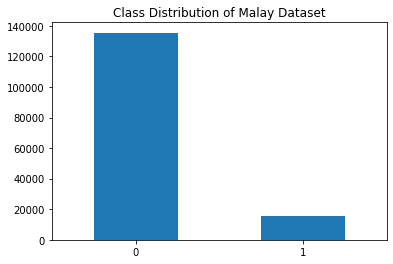

In [ ]:
#Plotting the class distribution 
malay_ds['class'].value_counts().plot.bar()
plt.title("Class Distribution of Malay Dataset")
plt.xticks(rotation = 360)

In [ ]:
#Finding the percentage of each class 
malay_ds['class'].value_counts(normalize= True)*100

0    89.797623
1    10.202377
Name: class, dtype: float64

In [ ]:
#Installing sklearn
!pip install sklearn

     |################################| 22.2 MB 329 kB/s  eta 0:00:01    |##########                      | 7.1 MB 14.7 MB/s eta 0:00:02     |###########                     | 8.3 MB 14.7 MB/s eta 0:00:01
     |################################| 25.9 MB 24.3 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=01f7d833d90bad9f587f0dbafaf00dfa4c5ce520fc5b3230e9c6bcfe5999bc70
  Stored in directory: /root/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
from sklearn.utils import resample

# Separate toxic and non-toxic classes
malay_ds_toxic = malay_ds.loc[malay_ds['class'] == 1]
malay_ds_non_toxic = malay_ds.loc[malay_ds['class'] == 0]

 
# Downsample non-toxic class
malay_ds_non_toxic_downsampled = resample(malay_ds_non_toxic, 
                                 replace= False,    # sample without replacement
                                 n_samples= 15391,   # to match minority class
                                 random_state= 10)   # reproducible results
 
# Combine toxic class with downsampled non-toxic class
malay_ds = pd.concat([malay_ds_non_toxic_downsampled, malay_ds_toxic])

In [ ]:
#Display new class counts
malay_ds['class'].value_counts()

1    15391
0    15391
Name: class, dtype: int64

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

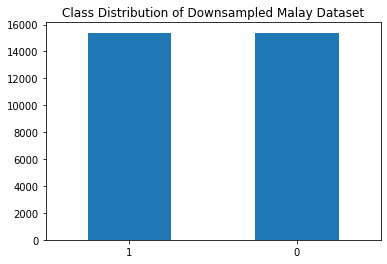

In [ ]:
#Plotting class distribution of downsampled Malay dataset
malay_ds['class'].value_counts().plot.bar()
plt.title("Class Distribution of Downsampled Malay Dataset")
plt.xticks(rotation=360)

In [ ]:
#Display new percentage of classes
malay_ds['class'].value_counts(normalize= True)*100

1    50.0
0    50.0
Name: class, dtype: float64

# Preprocessing datasets

In [ ]:
#Installing "tweet-preprocessor"
!pip install tweet-preprocessor

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
#Installing "nltk"
!pip install nltk

In [ ]:
#Installing "emoji"
!pip install emoji

     |################################| 1.5 MB 12.4 MB/s eta 0:00:01
     |################################| 748 kB 3.4 MB/s eta 0:00:01     |############                    | 296 kB 3.4 MB/s eta 0:00:01
  Attempting uninstall: regex
    Found existing installation: regex 2020.11.13
    Uninstalling regex-2020.11.13:
      Successfully uninstalled regex-2020.11.13
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


## Preprocessing English dataset

In [ ]:
#Importing relevant libraries
import html
import preprocessor as p
import string
import nltk
from nltk.corpus import stopwords
from nltk import TweetTokenizer
import regex as re
import emoji
from sklearn.model_selection import train_test_split

In [ ]:
#Decode the HTML entities to emojis
eng_ds['tweet'] = eng_ds['tweet'].apply(lambda x: html.unescape(x))

#Displaying english dataset after decoding emojis
eng_ds

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. & as a man you should always take the trash out...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,0
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,0
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya ,0
...,...,...
10083,@parkourboy_123 bro take it down u are just a fake ass friend and an ungrateful piece of shit u should be thank faggot,1
10084,"@ARitzka @reverbrony @ObabScribbler @StarryFlame everytime you suck a dick, you look like a faggot. Go figure :P",1
10085,@kessner_tara this is my pic u faggot,1
10086,@imreallyjai we need you in chat you dirty faggot. IT'S THE NUTSHACK,1


In [ ]:
# Removing user mentions, and URLs
def remove_mentions_url(text):
  p.set_options(p.OPT.MENTION,  
                p.OPT.URL)
  cleaned_text = p.clean(text)
  return(cleaned_text)

#Creating a new column for cleaned text
eng_ds['text'] = eng_ds['tweet'].apply(remove_mentions_url)

#Displaying english dataset after removing user mentions and URLs
eng_ds

,tweet,class,text
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. & as a man you should always take the trash out...,0,!!! RT : As a woman you shouldn't complain about cleaning up your house. & as a man you should always take the trash out...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,0,!!!!! RT : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,0,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitch and she start to cry? You be confused as shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,0,!!!!!!!!! RT : she look like a tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya ,0,!!!!!!!!!!!!! RT : The shit you hear about me might be true or it might be faker than the bitch who told it to ya 
...,...,...,...
10083,@parkourboy_123 bro take it down u are just a fake ass friend and an ungrateful piece of shit u should be thank faggot,1,bro take it down u are just a fake ass friend and an ungrateful piece of shit u should be thank faggot
10084,"@ARitzka @reverbrony @ObabScribbler @StarryFlame everytime you suck a dick, you look like a faggot. Go figure :P",1,"everytime you suck a dick, you look like a faggot. Go figure :P"
10085,@kessner_tara this is my pic u faggot,1,this is my pic u faggot
10086,@imreallyjai we need you in chat you dirty faggot. IT'S THE NUTSHACK,1,we need you in chat you dirty faggot. IT'S THE NUTSHACK


In [ ]:
#Defining a function to remove punctuations
def remove_punctuation(text):
  #Removing smart quotes
  text = text.replace('“', '')
  text = text.replace('”', '')
  #Removing other punctuations
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return(nopunc)

#Remove punctuations
eng_ds['text'] = eng_ds['text'].apply(remove_punctuation)

#Displaying english dataset after removing punctuations
eng_ds

,tweet,class,text
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. & as a man you should always take the trash out...,0,RT As a woman you shouldnt complain about cleaning up your house as a man you should always take the trash out
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,0,RT boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,0,RT Dawg RT You ever fuck a bitch and she start to cry You be confused as shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,0,RT she look like a tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya ,0,RT The shit you hear about me might be true or it might be faker than the bitch who told it to ya 
...,...,...,...
10083,@parkourboy_123 bro take it down u are just a fake ass friend and an ungrateful piece of shit u should be thank faggot,1,bro take it down u are just a fake ass friend and an ungrateful piece of shit u should be thank faggot
10084,"@ARitzka @reverbrony @ObabScribbler @StarryFlame everytime you suck a dick, you look like a faggot. Go figure :P",1,everytime you suck a dick you look like a faggot Go figure P
10085,@kessner_tara this is my pic u faggot,1,this is my pic u faggot
10086,@imreallyjai we need you in chat you dirty faggot. IT'S THE NUTSHACK,1,we need you in chat you dirty faggot ITS THE NUTSHACK


In [ ]:
#Defining a function to remove reserved words
def remove_reserved_words(text):
  p.set_options(p.OPT.RESERVED)
  cleaned_text = p.clean(text)
  return(cleaned_text)

# Removing reserved words (RT and FAV)
eng_ds['text'] = eng_ds['text'].apply(remove_reserved_words)

#Displaying english dataset after removing reserved words
eng_ds

,tweet,class,text
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. & as a man you should always take the trash out...,0,RT As a woman you shouldnt complain about cleaning up your house as a man you should always take the trash out
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,0,RT boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,0,RT Dawg RT You ever fuck a bitch and she start to cry You be confused as shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,0,RT she look like a tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya ,0,RT The shit you hear about me might be true or it might be faker than the bitch who told it to ya 
...,...,...,...
10083,@parkourboy_123 bro take it down u are just a fake ass friend and an ungrateful piece of shit u should be thank faggot,1,bro take it down u are just a fake ass friend and an ungrateful piece of shit u should be thank faggot
10084,"@ARitzka @reverbrony @ObabScribbler @StarryFlame everytime you suck a dick, you look like a faggot. Go figure :P",1,everytime you suck a dick you look like a faggot Go figure P
10085,@kessner_tara this is my pic u faggot,1,this is my pic u faggot
10086,@imreallyjai we need you in chat you dirty faggot. IT'S THE NUTSHACK,1,we need you in chat you dirty faggot ITS THE NUTSHACK


In [ ]:
#Lowercasing all text
eng_ds['text'] = eng_ds['text'].str.lower()

#Displaying english dataset after lowercasing text
eng_ds

,tweet,class,text
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. & as a man you should always take the trash out...,0,rt as a woman you shouldnt complain about cleaning up your house as a man you should always take the trash out
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,0,rt boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,0,rt dawg rt you ever fuck a bitch and she start to cry you be confused as shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,0,rt she look like a tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya ,0,rt the shit you hear about me might be true or it might be faker than the bitch who told it to ya 
...,...,...,...
10083,@parkourboy_123 bro take it down u are just a fake ass friend and an ungrateful piece of shit u should be thank faggot,1,bro take it down u are just a fake ass friend and an ungrateful piece of shit u should be thank faggot
10084,"@ARitzka @reverbrony @ObabScribbler @StarryFlame everytime you suck a dick, you look like a faggot. Go figure :P",1,everytime you suck a dick you look like a faggot go figure p
10085,@kessner_tara this is my pic u faggot,1,this is my pic u faggot
10086,@imreallyjai we need you in chat you dirty faggot. IT'S THE NUTSHACK,1,we need you in chat you dirty faggot its the nutshack


In [ ]:
#Demojize all emojis into words
eng_ds['text'] = eng_ds['text'].apply(lambda text: emoji.demojize(text, delimiters=(" ", " ")))

#Displaying english dataset after demojization
eng_ds

,tweet,class,text
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. & as a man you should always take the trash out...,0,rt as a woman you shouldnt complain about cleaning up your house as a man you should always take the trash out
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,0,rt boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,0,rt dawg rt you ever fuck a bitch and she start to cry you be confused as shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,0,rt she look like a tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya ,0,rt the shit you hear about me might be true or it might be faker than the bitch who told it to ya 
...,...,...,...
10083,@parkourboy_123 bro take it down u are just a fake ass friend and an ungrateful piece of shit u should be thank faggot,1,bro take it down u are just a fake ass friend and an ungrateful piece of shit u should be thank faggot
10084,"@ARitzka @reverbrony @ObabScribbler @StarryFlame everytime you suck a dick, you look like a faggot. Go figure :P",1,everytime you suck a dick you look like a faggot go figure p
10085,@kessner_tara this is my pic u faggot,1,this is my pic u faggot
10086,@imreallyjai we need you in chat you dirty faggot. IT'S THE NUTSHACK,1,we need you in chat you dirty faggot its the nutshack


In [ ]:
#Displaying stopwords
nltk.download('stopwords')

stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#Adding rt and fav in stopwords 
additional = ['rt', 'fav']
stopword = set().union(stopwords.words('english'), additional)

#Displaying new list
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'fav',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'o

In [ ]:
#Defining negation stop words
negation_words = ['no', 'nor', 'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
                  "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', 
                  "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 
                  'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

#Creating a new list without negation stop words
new_stopwords = [word for word in stopword if word not in negation_words]

#Arrange new list in alphabetical order
new_stopwords = sorted(new_stopwords)

#Display new list 
new_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'd',
 'did',
 'do',
 'does',
 'doing',
 'down',
 'during',
 'each',
 'fav',
 'few',
 'for',
 'from',
 'further',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'more',
 'most',
 'my',
 'myself',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 'rt',
 's',
 'same',
 'she',
 "she's",
 'should',
 "should've",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under'

In [ ]:
#Defining tokenizer
tokenizer = TweetTokenizer()

#Removing stopwords
eng_ds['text'] = eng_ds['text'].apply(lambda text: [word for word in tokenizer.tokenize(text) if not word in new_stopwords])

#Displaying english dataset after removing stopwords
eng_ds

,tweet,class,text
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. & as a man you should always take the trash out...,0,"[woman, shouldnt, complain, cleaning, house, man, always, take, trash]"
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,0,"[boy, dats, coldtyga, dwn, bad, cuffin, dat, hoe, 1st, place]"
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,0,"[dawg, ever, fuck, bitch, start, cry, confused, shit]"
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,0,"[look, like, tranny]"
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya ,0,"[shit, hear, might, true, might, faker, bitch, told, ya, ]"
...,...,...,...
10083,@parkourboy_123 bro take it down u are just a fake ass friend and an ungrateful piece of shit u should be thank faggot,1,"[bro, take, u, fake, ass, friend, ungrateful, piece, shit, u, thank, faggot]"
10084,"@ARitzka @reverbrony @ObabScribbler @StarryFlame everytime you suck a dick, you look like a faggot. Go figure :P",1,"[everytime, suck, dick, look, like, faggot, go, figure, p]"
10085,@kessner_tara this is my pic u faggot,1,"[pic, u, faggot]"
10086,@imreallyjai we need you in chat you dirty faggot. IT'S THE NUTSHACK,1,"[need, chat, dirty, faggot, nutshack]"


In [ ]:
#Joining lists of words back into sentence
eng_ds['text'] = eng_ds['text'].apply(lambda text: ' '.join(text))

#Displaying english dataset after joining 
eng_ds

,tweet,class,text
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. & as a man you should always take the trash out...,0,woman shouldnt complain cleaning house man always take trash
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,0,boy dats coldtyga dwn bad cuffin dat hoe 1st place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,0,dawg ever fuck bitch start cry confused shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,0,look like tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya ,0,shit hear might true might faker bitch told ya 
...,...,...,...
10083,@parkourboy_123 bro take it down u are just a fake ass friend and an ungrateful piece of shit u should be thank faggot,1,bro take u fake ass friend ungrateful piece shit u thank faggot
10084,"@ARitzka @reverbrony @ObabScribbler @StarryFlame everytime you suck a dick, you look like a faggot. Go figure :P",1,everytime suck dick look like faggot go figure p
10085,@kessner_tara this is my pic u faggot,1,pic u faggot
10086,@imreallyjai we need you in chat you dirty faggot. IT'S THE NUTSHACK,1,need chat dirty faggot nutshack


In [ ]:
#Subsetting columns required for training
eng_ds = eng_ds[['text', 'class']]

#Displaying english dataset after subsetting
eng_ds

,text,class
0,woman shouldnt complain cleaning house man always take trash,0
1,boy dats coldtyga dwn bad cuffin dat hoe 1st place,0
2,dawg ever fuck bitch start cry confused shit,0
3,look like tranny,0
4,shit hear might true might faker bitch told ya ,0
...,...,...
10083,bro take u fake ass friend ungrateful piece shit u thank faggot,1
10084,everytime suck dick look like faggot go figure p,1
10085,pic u faggot,1
10086,need chat dirty faggot nutshack,1


In [ ]:
#Train test and validation split with ratio of 60:20:20
train_eng, test_eng = train_test_split(eng_ds, train_size = 0.8, test_size = 0.2,  stratify = eng_ds["class"], random_state = 7)

train_eng, val_eng = train_test_split(train_eng, train_size = 0.75, test_size = 0.25, stratify = train_eng["class"], random_state = 7)

In [ ]:
#Separating features and target variable in train, test and validation datasets
x_train_eng = list(train_eng['text'])
y_train_eng = list(train_eng['class'])

x_val_eng = list(val_eng['text'])
y_val_eng = list(val_eng['class'])

x_test_eng = list(test_eng['text'])
y_test_eng = list(test_eng['class'])

## Saving pre-processed eng_ds (with spell-check)

In [ ]:
import pickle

In [ ]:
object = eng_ds
filehandler = open('pre-processed_eng_ds', 'wb')
pickle.dump(object, filehandler)

In [ ]:
filehandler = open('pre-processed_eng_ds', 'rb')
eng_ds = pickle.load(filehandler)

## Preprocessing Malay dataset

In [ ]:
#Installing 'malaya'
!pip install malaya

     |################################| 2.2 MB 11.1 MB/s eta 0:00:01
     |################################| 1.6 MB 30.9 MB/s eta 0:00:01
     |################################| 288 kB 31.1 MB/s eta 0:00:01
     |################################| 64 kB 1.6 MB/s eta 0:00:011
     |################################| 235 kB 33.5 MB/s eta 0:00:01
     |################################| 41 kB 524 kB/s  eta 0:00:01
     |################################| 70 kB 16.0 MB/s eta 0:00:01
     |################################| 339 kB 24.2 MB/s eta 0:00:01
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=44518 sha256=7d196b51d4350ae2c11e9e534888722be660745f0fcfaeace81bb30a6d61092a
  Stored in directory: /root/.cache/pip/wheels/ff/2a/24/75041425faf3347ab146a4a3d0484f723b2c44a7966a06e3f0
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=56392 sha256=908b8d80ee12dab7e05d729e33f8ad246fff85436865642b96c3c792ff6cd83e
  Stored in directory: /root/.cache/pi

In [ ]:
#Defining a function to remove URLs
def remove_url(text):
  p.set_options(p.OPT.URL)
  cleaned_text = p.clean(text)
  return(cleaned_text)

#Creating a new column with URLs removed
malay_ds['text'] = malay_ds['comments'].apply(remove_url)

#Displaying malay dataset after removing URLs
malay_ds

,comments,class,text
1765,"selamat datang, dan selamat datang ke wikipedia! terima kasih atas sumbangan anda. Saya harap anda suka tempat dan memutuskan untuk tinggal. di sini adalah beberapa halaman yang anda mungkin ingin melihat lima tiang wikipedia cara mengedit laman bantuan halaman tutorial bagaimana menulis manual artikel gaya yang bagus yang anda dialu-alukan untuk terus menyunting artikel tanpa mendaftar, tetapi anda mungkin ingin membuat akaun . melakukan yang penting adalah percuma, tidak memerlukan maklumat peribadi, dan menyediakan beberapa manfaat. jika anda mengedit tanpa nama pengguna, alamat ip anda digunakan untuk mengenal pasti anda. dalam apa jua keadaan, saya harap anda suka mengedit di sini dan menjadi wikipedian! sila tandakan komen anda pada halaman perbincangan menggunakan empat tildes ini secara automatik akan menghasilkan alamat ip atau nama pengguna anda secara automatik jika anda log masuk dan tarikh. jika anda memerlukan bantuan, periksa soalan wikipedia, tanya saya, atau tanyakan soalan anda dan kemudian letakkan bantuan sebelum soalan di halaman ini. lagi, selamat datang!",0,"selamat datang, dan selamat datang ke wikipedia! terima kasih atas sumbangan anda. Saya harap anda suka tempat dan memutuskan untuk tinggal. di sini adalah beberapa halaman yang anda mungkin ingin melihat lima tiang wikipedia cara mengedit laman bantuan halaman tutorial bagaimana menulis manual artikel gaya yang bagus yang anda dialu-alukan untuk terus menyunting artikel tanpa mendaftar, tetapi anda mungkin ingin membuat akaun . melakukan yang penting adalah percuma, tidak memerlukan maklumat peribadi, dan menyediakan beberapa manfaat. jika anda mengedit tanpa nama pengguna, alamat ip anda digunakan untuk mengenal pasti anda. dalam apa jua keadaan, saya harap anda suka mengedit di sini dan menjadi wikipedian! sila tandakan komen anda pada halaman perbincangan menggunakan empat tildes ini secara automatik akan menghasilkan alamat ip atau nama pengguna anda secara automatik jika anda log masuk dan tarikh. jika anda memerlukan bantuan, periksa soalan wikipedia, tanya saya, atau tanyakan soalan anda dan kemudian letakkan bantuan sebelum soalan di halaman ini. lagi, selamat datang!"
12559,"pasti ada penggabungan, sekali lagi saya mempunyai masa untuk menulis semula halaman. masyarakat adalah salah, sekali lagi. kualiti dan ketepatan artikel itu tidak akan dikorbankan untuk menghilangkan 5 atau lebih penyunting yang salah dengan pendapat. sumber dan kepincangan ketepatan sebarang konsensus yang salah.",0,"pasti ada penggabungan, sekali lagi saya mempunyai masa untuk menulis semula halaman. masyarakat adalah salah, sekali lagi. kualiti dan ketepatan artikel itu tidak akan dikorbankan untuk menghilangkan 5 atau lebih penyunting yang salah dengan pendapat. sumber dan kepincangan ketepatan sebarang konsensus yang salah."
7038,selamat hari Krismas dan selamat tahun baru !,0,selamat hari Krismas dan selamat tahun baru !
13729,"gangguan anda terhadap saya akan anda berhenti berhenti mengikuti saya dan membalikkan setiap pengeditan yang saya buat, saya menyedari bahawa kita mempunyai perselisihan, tetapi sekarang semakin konyol. anda memulangkan setiap perubahan yang saya buat dan jika ia berterusan saya akan melaporkan anda untuk gangguan.",0,"gangguan anda terhadap saya akan anda berhenti berhenti mengikuti saya dan membalikkan setiap pengeditan yang saya buat, saya menyedari bahawa kita mempunyai perselisihan, tetapi sekarang semakin konyol. anda memulangkan setiap perubahan yang saya buat dan jika ia berterusan saya akan melaporkan anda untuk gangguan."
4209,"pencalonan untuk status artikel yang baik ditahan\r\n\r\nartikel itu boleh menggunakan lebih banyak imej, memandangkan panjang dan perkara. peta akan membantu untuk mengikat dalam senarai ahli pasukan. Selain dari beberapa perbaikan gramatikal minor, bahagian utama memerlukan pengembangan dan penambahbaikan; pada dasarnya ia harus menjadi versi ringkas artikel itu sendiri jadi c

In [ ]:
#Removing punctuations
malay_ds['text'] = malay_ds['text'].apply(remove_punctuation)

#Displaying malay dataset after removing punctuations
malay_ds

,comments,class,text
1765,"selamat datang, dan selamat datang ke wikipedia! terima kasih atas sumbangan anda. Saya harap anda suka tempat dan memutuskan untuk tinggal. di sini adalah beberapa halaman yang anda mungkin ingin melihat lima tiang wikipedia cara mengedit laman bantuan halaman tutorial bagaimana menulis manual artikel gaya yang bagus yang anda dialu-alukan untuk terus menyunting artikel tanpa mendaftar, tetapi anda mungkin ingin membuat akaun . melakukan yang penting adalah percuma, tidak memerlukan maklumat peribadi, dan menyediakan beberapa manfaat. jika anda mengedit tanpa nama pengguna, alamat ip anda digunakan untuk mengenal pasti anda. dalam apa jua keadaan, saya harap anda suka mengedit di sini dan menjadi wikipedian! sila tandakan komen anda pada halaman perbincangan menggunakan empat tildes ini secara automatik akan menghasilkan alamat ip atau nama pengguna anda secara automatik jika anda log masuk dan tarikh. jika anda memerlukan bantuan, periksa soalan wikipedia, tanya saya, atau tanyakan soalan anda dan kemudian letakkan bantuan sebelum soalan di halaman ini. lagi, selamat datang!",0,selamat datang dan selamat datang ke wikipedia terima kasih atas sumbangan anda Saya harap anda suka tempat dan memutuskan untuk tinggal di sini adalah beberapa halaman yang anda mungkin ingin melihat lima tiang wikipedia cara mengedit laman bantuan halaman tutorial bagaimana menulis manual artikel gaya yang bagus yang anda dialualukan untuk terus menyunting artikel tanpa mendaftar tetapi anda mungkin ingin membuat akaun melakukan yang penting adalah percuma tidak memerlukan maklumat peribadi dan menyediakan beberapa manfaat jika anda mengedit tanpa nama pengguna alamat ip anda digunakan untuk mengenal pasti anda dalam apa jua keadaan saya harap anda suka mengedit di sini dan menjadi wikipedian sila tandakan komen anda pada halaman perbincangan menggunakan empat tildes ini secara automatik akan menghasilkan alamat ip atau nama pengguna anda secara automatik jika anda log masuk dan tarikh jika anda memerlukan bantuan periksa soalan wikipedia tanya saya atau tanyakan soalan anda dan kemudian letakkan bantuan sebelum soalan di halaman ini lagi selamat datang
12559,"pasti ada penggabungan, sekali lagi saya mempunyai masa untuk menulis semula halaman. masyarakat adalah salah, sekali lagi. kualiti dan ketepatan artikel itu tidak akan dikorbankan untuk menghilangkan 5 atau lebih penyunting yang salah dengan pendapat. sumber dan kepincangan ketepatan sebarang konsensus yang salah.",0,pasti ada penggabungan sekali lagi saya mempunyai masa untuk menulis semula halaman masyarakat adalah salah sekali lagi kualiti dan ketepatan artikel itu tidak akan dikorbankan untuk menghilangkan 5 atau lebih penyunting yang salah dengan pendapat sumber dan kepincangan ketepatan sebarang konsensus yang salah
7038,selamat hari Krismas dan selamat tahun baru !,0,selamat hari Krismas dan selamat tahun baru
13729,"gangguan anda terhadap saya akan anda berhenti berhenti mengikuti saya dan membalikkan setiap pengeditan yang saya buat, saya menyedari bahawa kita mempunyai perselisihan, tetapi sekarang semakin konyol. anda memulangkan setiap perubahan yang saya buat dan jika ia berterusan saya akan melaporkan anda untuk gangguan.",0,gangguan anda terhadap saya akan anda berhenti berhenti mengikuti saya dan membalikkan setiap pengeditan yang saya buat saya menyedari bahawa kita mempunyai perselisihan tetapi sekarang semakin konyol anda memulangkan setiap perubahan yang saya buat dan jika ia berterusan saya akan melaporkan anda untuk gangguan
4209,"pencalonan untuk status artikel yang baik ditahan\r\n\r\nartikel itu boleh menggunakan lebih banyak imej, memandangkan panjang dan perkara. peta akan membantu untuk mengikat dalam senarai ahli pasukan. Selain dari beberapa perbaikan gramatikal minor, bahagian utama memerlukan pengembangan dan penambahbaikan; pada dasarnya ia harus menjadi versi ringkas artikel itu sendiri jadi cuba menyebutkan pasukan, beberapa eksper

In [ ]:
#Lowercasing all text
malay_ds['text'] = malay_ds['text'].str.lower()

#Displaying malay dataset after lowercasing text
malay_ds

,comments,class,text
1765,"selamat datang, dan selamat datang ke wikipedia! terima kasih atas sumbangan anda. Saya harap anda suka tempat dan memutuskan untuk tinggal. di sini adalah beberapa halaman yang anda mungkin ingin melihat lima tiang wikipedia cara mengedit laman bantuan halaman tutorial bagaimana menulis manual artikel gaya yang bagus yang anda dialu-alukan untuk terus menyunting artikel tanpa mendaftar, tetapi anda mungkin ingin membuat akaun . melakukan yang penting adalah percuma, tidak memerlukan maklumat peribadi, dan menyediakan beberapa manfaat. jika anda mengedit tanpa nama pengguna, alamat ip anda digunakan untuk mengenal pasti anda. dalam apa jua keadaan, saya harap anda suka mengedit di sini dan menjadi wikipedian! sila tandakan komen anda pada halaman perbincangan menggunakan empat tildes ini secara automatik akan menghasilkan alamat ip atau nama pengguna anda secara automatik jika anda log masuk dan tarikh. jika anda memerlukan bantuan, periksa soalan wikipedia, tanya saya, atau tanyakan soalan anda dan kemudian letakkan bantuan sebelum soalan di halaman ini. lagi, selamat datang!",0,selamat datang dan selamat datang ke wikipedia terima kasih atas sumbangan anda saya harap anda suka tempat dan memutuskan untuk tinggal di sini adalah beberapa halaman yang anda mungkin ingin melihat lima tiang wikipedia cara mengedit laman bantuan halaman tutorial bagaimana menulis manual artikel gaya yang bagus yang anda dialualukan untuk terus menyunting artikel tanpa mendaftar tetapi anda mungkin ingin membuat akaun melakukan yang penting adalah percuma tidak memerlukan maklumat peribadi dan menyediakan beberapa manfaat jika anda mengedit tanpa nama pengguna alamat ip anda digunakan untuk mengenal pasti anda dalam apa jua keadaan saya harap anda suka mengedit di sini dan menjadi wikipedian sila tandakan komen anda pada halaman perbincangan menggunakan empat tildes ini secara automatik akan menghasilkan alamat ip atau nama pengguna anda secara automatik jika anda log masuk dan tarikh jika anda memerlukan bantuan periksa soalan wikipedia tanya saya atau tanyakan soalan anda dan kemudian letakkan bantuan sebelum soalan di halaman ini lagi selamat datang
12559,"pasti ada penggabungan, sekali lagi saya mempunyai masa untuk menulis semula halaman. masyarakat adalah salah, sekali lagi. kualiti dan ketepatan artikel itu tidak akan dikorbankan untuk menghilangkan 5 atau lebih penyunting yang salah dengan pendapat. sumber dan kepincangan ketepatan sebarang konsensus yang salah.",0,pasti ada penggabungan sekali lagi saya mempunyai masa untuk menulis semula halaman masyarakat adalah salah sekali lagi kualiti dan ketepatan artikel itu tidak akan dikorbankan untuk menghilangkan 5 atau lebih penyunting yang salah dengan pendapat sumber dan kepincangan ketepatan sebarang konsensus yang salah
7038,selamat hari Krismas dan selamat tahun baru !,0,selamat hari krismas dan selamat tahun baru
13729,"gangguan anda terhadap saya akan anda berhenti berhenti mengikuti saya dan membalikkan setiap pengeditan yang saya buat, saya menyedari bahawa kita mempunyai perselisihan, tetapi sekarang semakin konyol. anda memulangkan setiap perubahan yang saya buat dan jika ia berterusan saya akan melaporkan anda untuk gangguan.",0,gangguan anda terhadap saya akan anda berhenti berhenti mengikuti saya dan membalikkan setiap pengeditan yang saya buat saya menyedari bahawa kita mempunyai perselisihan tetapi sekarang semakin konyol anda memulangkan setiap perubahan yang saya buat dan jika ia berterusan saya akan melaporkan anda untuk gangguan
4209,"pencalonan untuk status artikel yang baik ditahan\r\n\r\nartikel itu boleh menggunakan lebih banyak imej, memandangkan panjang dan perkara. peta akan membantu untuk mengikat dalam senarai ahli pasukan. Selain dari beberapa perbaikan gramatikal minor, bahagian utama memerlukan pengembangan dan penambahbaikan; pada dasarnya ia harus menjadi versi ringkas artikel itu sendiri jadi cuba menyebutkan pasukan, beberapa eksper

In [ ]:
#Subsetting required columns for training
malay_ds = malay_ds[['text', 'class']]
                    
#Displaying malay dataset after subsetting
malay_ds

,text,class
1765,selamat datang dan selamat datang ke wikipedia terima kasih atas sumbangan anda saya harap anda suka tempat dan memutuskan untuk tinggal di sini adalah beberapa halaman yang anda mungkin ingin melihat lima tiang wikipedia cara mengedit laman bantuan halaman tutorial bagaimana menulis manual artikel gaya yang bagus yang anda dialualukan untuk terus menyunting artikel tanpa mendaftar tetapi anda mungkin ingin membuat akaun melakukan yang penting adalah percuma tidak memerlukan maklumat peribadi dan menyediakan beberapa manfaat jika anda mengedit tanpa nama pengguna alamat ip anda digunakan untuk mengenal pasti anda dalam apa jua keadaan saya harap anda suka mengedit di sini dan menjadi wikipedian sila tandakan komen anda pada halaman perbincangan menggunakan empat tildes ini secara automatik akan menghasilkan alamat ip atau nama pengguna anda secara automatik jika anda log masuk dan tarikh jika anda memerlukan bantuan periksa soalan wikipedia tanya saya atau tanyakan soalan anda dan kemudian letakkan bantuan sebelum soalan di halaman ini lagi selamat datang,0
12559,pasti ada penggabungan sekali lagi saya mempunyai masa untuk menulis semula halaman masyarakat adalah salah sekali lagi kualiti dan ketepatan artikel itu tidak akan dikorbankan untuk menghilangkan 5 atau lebih penyunting yang salah dengan pendapat sumber dan kepincangan ketepatan sebarang konsensus yang salah,0
7038,selamat hari krismas dan selamat tahun baru,0
13729,gangguan anda terhadap saya akan anda berhenti berhenti mengikuti saya dan membalikkan setiap pengeditan yang saya buat saya menyedari bahawa kita mempunyai perselisihan tetapi sekarang semakin konyol anda memulangkan setiap perubahan yang saya buat dan jika ia berterusan saya akan melaporkan anda untuk gangguan,0
4209,pencalonan untuk status artikel yang baik ditahan artikel itu boleh menggunakan lebih banyak imej memandangkan panjang dan perkara peta akan membantu untuk mengikat dalam senarai ahli pasukan selain dari beberapa perbaikan gramatikal minor bahagian utama memerlukan pengembangan dan penambahbaikan pada dasarnya ia harus menjadi versi ringkas artikel itu sendiri jadi cuba menyebutkan pasukan beberapa eksperimen eksplorasi tertentu roald amundsen dan lainlain juga ini juga terpakai kepada faktorfaktor yang menyumbang kepada kegagalan yang sepatutnya disebutkan dan bukannya merujuk kepada artikel lain jika artikel itu sangat dekat jadi saya meletakkan ini terus,0
...,...,...
17885,oops saya tidak sengaja menyunting halaman anda bodoh jatuh mati,1
17887,saya akan menyogok dia dengan komoditi yang paling berharga di internet banyak lucah kuda dia akan gembira,1
17888,tiada masalah robot yang anda tak kenal pasti saya kembali semula robot adalah seperti bodoh seperti ikan emas yang menjadikan mereka dua kali pintar sebagai pentadbir manusia di wikipedia saya akan bertaruh tidak ada penulis yang diterbitkan di kalangan mereka saya telah diterbitkan dan laman web ini adalah jenaka,1
17893,fuck you london kamu sekeping kotoran,1


In [ ]:
#Import malaya library
import malaya

#Displaying malay stopwords
malay_stopwords = sorted(malaya.text.function.get_stopwords())

malay_stopwords

["'s",
 "'ve",
 'abang',
 'acapkali',
 'ada',
 'adakah',
 'adakan',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'akupun',
 'al',
 'alangkah',
 'alkisah',
 'allah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaramu',
 'antaranya',
 'apa',
 'apa-apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apapun',
 'apatah',
 'arakian',
 'artinya',
 'as',
 'asal',
 'asalam',
 'asalkan',
 'assalam',
 'assalamualaikum',
 'atas',
 'atasmu',
 'atasnya',
 'atau',
 'ataukah',
 'ataupun',
 'atuk',
 'awak',
 'awal',
 'awalnya',
 'ayah',
 'baba',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bagimu',
 'baginda',
 'baginya',
 'bahawa',
 'bahawasanya',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bak',
 'bakal',
 'bakalan',
 'balik',
 'bang',
 'banyak',
 'banyaknya',
 'bapak',
 'bar',
 'barangkali',
 'barangsiapa',
 'baru',
 'bawah',
 'bebera

In [ ]:
#Define negation stopwords in malay language
negation_words = ['bukan', 'bukankah', 'bukanlah', 'bukannya', 'setidak-tidaknya', 'setidaknya', 'tak',
                  'takda', 'takde', 'tiada', 'tiadakah', 'tiadalah', 'tidak', 'tidakkah', 'tidaklah',
                  'usah', 'usahlah', 'xda', 'xde', 'xkan', 'xkira', 'xleh', 'xtahu']

#Creating a new list without negation stop words
new_malay_stopwords = [word for word in malay_stopwords if word not in negation_words]

#Arrange new list in alphabetical order
new_malay_stopwords = sorted(new_malay_stopwords)

#Display new list 
new_malay_stopwords


["'s",
 "'ve",
 'abang',
 'acapkali',
 'ada',
 'adakah',
 'adakan',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'akupun',
 'al',
 'alangkah',
 'alkisah',
 'allah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaramu',
 'antaranya',
 'apa',
 'apa-apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apapun',
 'apatah',
 'arakian',
 'artinya',
 'as',
 'asal',
 'asalam',
 'asalkan',
 'assalam',
 'assalamualaikum',
 'atas',
 'atasmu',
 'atasnya',
 'atau',
 'ataukah',
 'ataupun',
 'atuk',
 'awak',
 'awal',
 'awalnya',
 'ayah',
 'baba',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bagimu',
 'baginda',
 'baginya',
 'bahawa',
 'bahawasanya',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bak',
 'bakal',
 'bakalan',
 'balik',
 'bang',
 'banyak',
 'banyaknya',
 'bapak',
 'bar',
 'barangkali',
 'barangsiapa',
 'baru',
 'bawah',
 'bebera

In [ ]:
#Defining tokenizer
malay_tokenizer = malaya.preprocessing.Tokenizer()

#Removing stopwords
malay_ds['text'] = malay_ds['text'].apply(lambda text: [word for word in malay_tokenizer.tokenize(text) if not word in new_malay_stopwords])

#Displaying malay dataset after removing stopwords
malay_ds

,text,class
1765,"[selamat, selamat, wikipedia, terima, kasih, sumbangan, suka, memutuskan, tinggal, halaman, tiang, wikipedia, mengedit, laman, bantuan, halaman, tutorial, menulis, manual, artikel, gaya, bagus, dialualukan, menyunting, artikel, mendaftar, akaun, tidak, maklumat, peribadi, menyediakan, manfaat, mengedit, nama, pengguna, alamat, ip, mengenal, suka, mengedit, wikipedian, tandakan, komen, halaman, perbincangan, tildes, automatik, menghasilkan, alamat, ip, nama, pengguna, automatik, log, masuk, tarikh, bantuan, periksa, soalan, wikipedia, soalan, letakkan, bantuan, soalan, halaman, selamat]",0
12559,"[penggabungan, menulis, halaman, masyarakat, salah, kualiti, ketepatan, artikel, tidak, dikorbankan, menghilangkan, 5, penyunting, salah, pendapat, sumber, kepincangan, ketepatan, sebarang, konsensus, salah]",0
7038,"[selamat, krismas, selamat]",0
13729,"[gangguan, berhenti, berhenti, mengikuti, membalikkan, pengeditan, menyedari, perselisihan, konyol, memulangkan, perubahan, berterusan, melaporkan, gangguan]",0
4209,"[pencalonan, status, artikel, ditahan, artikel, imej, memandangkan, peta, membantu, mengikat, senarai, ahli, pasukan, perbaikan, gramatikal, minor, bahagian, utama, pengembangan, penambahbaikan, dasarnya, versi, ringkas, artikel, pasukan, eksperimen, eksplorasi, roald, amundsen, lainlain, terpakai, faktorfaktor, menyumbang, kegagalan, bukannya, merujuk, artikel, artikel, meletakkan]",0
...,...,...
17885,"[oops, tidak, sengaja, menyunting, halaman, bodoh, jatuh, mati]",1
17887,"[menyogok, komoditi, berharga, internet, lucah, kuda, gembira]",1
17888,"[tiada, robot, tak, kenal, robot, bodoh, ikan, emas, menjadikan, kali, pintar, pentadbir, manusia, wikipedia, bertaruh, tidak, penulis, diterbitkan, kalangan, diterbitkan, laman, web, jenaka]",1
17893,"[fuck, you, london, sekeping, kotoran]",1


In [ ]:
#Joining lists of words back into sentence
malay_ds['text'] = malay_ds['text'].apply(lambda text: ' '.join(text))

#Displaying malay dataset after joining 
malay_ds

,text,class
1765,selamat selamat wikipedia terima kasih sumbangan suka memutuskan tinggal halaman tiang wikipedia mengedit laman bantuan halaman tutorial menulis manual artikel gaya bagus dialualukan menyunting artikel mendaftar akaun tidak maklumat peribadi menyediakan manfaat mengedit nama pengguna alamat ip mengenal suka mengedit wikipedian tandakan komen halaman perbincangan tildes automatik menghasilkan alamat ip nama pengguna automatik log masuk tarikh bantuan periksa soalan wikipedia soalan letakkan bantuan soalan halaman selamat,0
12559,penggabungan menulis halaman masyarakat salah kualiti ketepatan artikel tidak dikorbankan menghilangkan 5 penyunting salah pendapat sumber kepincangan ketepatan sebarang konsensus salah,0
7038,selamat krismas selamat,0
13729,gangguan berhenti berhenti mengikuti membalikkan pengeditan menyedari perselisihan konyol memulangkan perubahan berterusan melaporkan gangguan,0
4209,pencalonan status artikel ditahan artikel imej memandangkan peta membantu mengikat senarai ahli pasukan perbaikan gramatikal minor bahagian utama pengembangan penambahbaikan dasarnya versi ringkas artikel pasukan eksperimen eksplorasi roald amundsen lainlain terpakai faktorfaktor menyumbang kegagalan bukannya merujuk artikel artikel meletakkan,0
...,...,...
17885,oops tidak sengaja menyunting halaman bodoh jatuh mati,1
17887,menyogok komoditi berharga internet lucah kuda gembira,1
17888,tiada robot tak kenal robot bodoh ikan emas menjadikan kali pintar pentadbir manusia wikipedia bertaruh tidak penulis diterbitkan kalangan diterbitkan laman web jenaka,1
17893,fuck you london sekeping kotoran,1


In [ ]:
#Train test and validation split with a ratio of 60:20:20
train_mal, test_mal = train_test_split(malay_ds, train_size = 0.8, test_size = 0.2, stratify = malay_ds["class"], random_state = 7)

train_mal, val_mal = train_test_split(train_mal, train_size = 0.75, test_size = 0.25, stratify = train_mal["class"], random_state = 7)

In [ ]:
#Separating features and target variable in train, test and validation datasets
x_train_mal = list(train_mal['text'])
y_train_mal = list(train_mal['class'])

x_val_mal = list(val_mal['text'])
y_val_mal = list(val_mal['class'])

x_test_mal = list(test_mal['text'])
y_test_mal = list(test_mal['class'])


## Saving pre-processed malay dataset

In [ ]:
object = malay_ds
filehandler = open('pre-processed_malay_ds', 'wb')
pickle.dump(object, filehandler)

In [ ]:
filehandler = open('pre-processed_malay_ds', 'rb')
malay_ds = pickle.load(filehandler)

# Building the classification model 


In [ ]:
!pip install transformers

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
!pip install seaborn

In [ ]:
import tensorflow as tf
import random
import torch
from transformers import TrainingArguments, Trainer, BertTokenizer, BertForSequenceClassification
from transformers.file_utils import is_tf_available, is_torch_available
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns

     |################################| 292 kB 23.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


## English Model

In [ ]:
#Set seed to ensure reproducibility
def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)

#Setting seed value as 7
set_seed(7)

In [ ]:
#Finding out the average and max word length for train english dataset
print('Average word length for the English train dataset is {0:.0f}.'.format(np.mean(train_eng['text'].apply(lambda x: len(x.split())))))
print('Maximum word length for the English train dataset is {0:.0f}.\n'.format(np.max(train_eng['text'].apply(lambda x: len(x.split())))))

#Finding out the average and max word length for validation english dataset
print('Average word length for the English validation dataset is {0:.0f}.'.format(np.mean(val_eng['text'].apply(lambda x: len(x.split())))))
print('Maximum word length for the English validation dataset is {0:.0f}.'.format(np.max(val_eng['text'].apply(lambda x: len(x.split())))))

Average word length for the English train dataset is 8.
Maximum word length for the English train dataset is 75.

Average word length for the English validation dataset is 8.
Maximum word length for the English validation dataset is 83.


Text(0.5, 1.0, 'Distribution of text length in words')

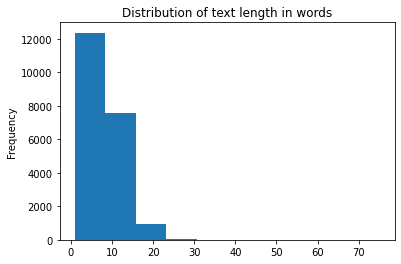

In [ ]:
#Plotting distribution of text length in words in training dataset
train_eng['text'].apply(lambda x: len(x.split())).plot(kind='hist')
plt.title('Distribution of text length in words (training dataset)')

Text(0.5, 1.0, 'Distribution of text length in words (validation dataset)')

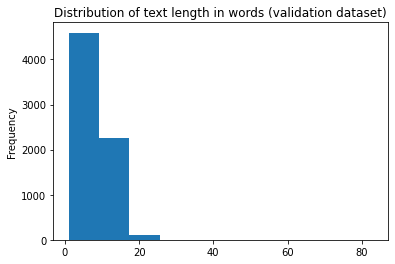

In [ ]:
#Plotting distribution of text length in words in validation dataset
val_eng['text'].apply(lambda x: len(x.split())).plot(kind='hist')
plt.title('Distribution of text length in words (validation dataset)')

In [ ]:
#Choosing pre-trained language model 
eng_model_name = "bert-base-uncased"

#Defining tokenizer 
eng_tokenizer = BertTokenizer.from_pretrained(eng_model_name)

In [ ]:
#Building the English models
eng_model_1 = BertForSequenceClassification.from_pretrained(eng_model_name)
eng_model_2 = BertForSequenceClassification.from_pretrained(eng_model_name)
eng_model_3 = BertForSequenceClassification.from_pretrained(eng_model_name)
eng_model_4 = BertForSequenceClassification.from_pretrained(eng_model_name)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
#Tokenizing text with defined bert tokenizer
x_train_eng = eng_tokenizer(x_train_eng, padding=True, truncation=True, max_length=20)
x_val_eng = eng_tokenizer(x_val_eng, padding=True, truncation=True, max_length=20)

In [ ]:
#Defining function to convert dataset into torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [ ]:
#Converting train and validation dataset to torch dataset
train_eng_ds = Dataset(x_train_eng, y_train_eng)
val_eng_ds = Dataset(x_val_eng, y_val_eng)

In [ ]:
#Defining a function to compute evaluation metrics
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

### English Model 1 (learning rate = 2e-5, batch size = 16)

In [ ]:
#Defining arguments for training English model 1 using learning rate = 2e-5 and batch size = 16
args_1 = TrainingArguments(
    output_dir="Checkpoints/eng_model_1",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    num_train_epochs=3,
    seed=7,
)

In [ ]:
#Defining trainer to train English model 1
trainer_1 = Trainer(
    model=eng_model_1,
    args=args_1,
    train_dataset=train_eng_ds,
    eval_dataset=val_eng_ds,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer_1.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.303928,0.242327,0.929596,0.894645,0.891927,0.893284
1000,0.218494,0.211203,0.933037,0.892689,0.906250,0.899418
1500,0.212632,0.212954,0.932894,0.888654,0.911024,0.899700
2000,0.188132,0.235499,0.932607,0.882721,0.917969,0.900000
2500,0.182909,0.255274,0.920705,0.925206,0.826823,0.873252
3000,0.165815,0.236664,0.934041,0.889687,0.913628,0.901499
3500,0.145802,0.234158,0.935618,0.900648,0.904948,0.902793


TrainOutput(global_step=3924, training_loss=0.19590465300673737)

In [ ]:
#Evaluate performance of English model 1
trainer_1.evaluate()

{'eval_loss': 0.24007520079612732,
 'eval_accuracy': 0.9354746200172067,
 'eval_precision': 0.9072934973637962,
 'eval_recall': 0.8962673611111112,
 'eval_f1': 0.9017467248908299,
 'epoch': 3.0}

In [ ]:
#Saving English model 1
model_path = "Models/English Model 1"
eng_model_1.save_pretrained(model_path)

### English Model 2 (learning rate = 3e-5, batch size = 16)

In [ ]:
#Defining arguments for training English model 2 using learning rate = 3e-5 and batch size = 16
args_2 = TrainingArguments(
    output_dir="Checkpoints/eng_model_2",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=3e-5,
    num_train_epochs=3,
    seed=7,
)

In [ ]:
#Defining trainer to train English model 2
trainer_2 = Trainer(
    model=eng_model_2,
    args=args_2,
    train_dataset=train_eng_ds,
    eval_dataset=val_eng_ds,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer_2.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.296711,0.266643,0.926011,0.911982,0.858941,0.884667
1000,0.218188,0.216555,0.932607,0.894578,0.902344,0.898444
1500,0.216106,0.202202,0.934184,0.897801,0.903646,0.900714
2000,0.189121,0.225774,0.933180,0.881328,0.921875,0.901146
2500,0.187634,0.215284,0.933180,0.909172,0.886285,0.897582
3000,0.166997,0.221336,0.934328,0.891433,0.912326,0.901759
3500,0.146279,0.237598,0.933037,0.897447,0.900174,0.898808


TrainOutput(global_step=3924, training_loss=0.19638021082202473)

In [ ]:
#Evaluate performance of English model 2
trainer_2.evaluate()

{'eval_loss': 0.2440120428800583,
 'eval_accuracy': 0.9328936048178951,
 'eval_precision': 0.9001743679163035,
 'eval_recall': 0.8962673611111112,
 'eval_f1': 0.8982166159199653,
 'epoch': 3.0}

In [ ]:
#Saving English model 2
model_path = "Models/English Model 2"
eng_model_2.save_pretrained(model_path)

### English Model 3 (learning rate = 2e-5, batch size = 16)

In [ ]:
#Defining arguments for training English model 3 using learning rate = 2e-5 and batch size = 32
args_3 = TrainingArguments(
    output_dir="Checkpoints/eng_model_3",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    num_train_epochs=3,
    seed=7,
)

In [ ]:
#Defining trainer to train English model 3
trainer_3 = Trainer(
    model=eng_model_3,
    args=args_3,
    train_dataset=train_eng_ds,
    eval_dataset=val_eng_ds,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer_3.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.263434,0.211101,0.933611,0.896938,0.902778,0.899849
1000,0.191424,0.194055,0.935905,0.901080,0.905382,0.903226
1500,0.163703,0.216040,0.932607,0.885943,0.913628,0.899573


TrainOutput(global_step=1962, training_loss=0.19093582511069698)

In [ ]:
#Evaluate performance of English model 3
trainer_3.evaluate()

{'eval_loss': 0.20836052298545837,
 'eval_accuracy': 0.9364783481502724,
 'eval_precision': 0.9043893959148196,
 'eval_recall': 0.9032118055555556,
 'eval_f1': 0.9038002171552662,
 'epoch': 3.0}

In [ ]:
#Saving English model 3
model_path = "Models/English Model 3"
eng_model_3.save_pretrained(model_path)

### English model 4 (learning rate = 3e-5, batch size = 16)

In [ ]:
#Defining arguments for training English model 4 using learning rate = 3e-5 and batch size = 32
args_4 = TrainingArguments(
    output_dir="Checkpoints/eng_model_4",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=3e-5,
    num_train_epochs=3,
    seed=7,
)

In [ ]:
#Defining trainer to train English model 4
trainer_4 = Trainer(
    model=eng_model_4,
    args=args_4,
    train_dataset=train_eng_ds,
    eval_dataset=val_eng_ds,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer_4.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.254349,0.198567,0.933754,0.901132,0.898003,0.899565
1000,0.189649,0.195398,0.935331,0.901256,0.903212,0.902233
1500,0.155778,0.211337,0.935188,0.901561,0.902344,0.901952


TrainOutput(global_step=1962, training_loss=0.18290066500322535)

In [ ]:
#Evaluate performance of English model 4
trainer_4.evaluate()

{'eval_loss': 0.21482139825820923,
 'eval_accuracy': 0.9350444508173215,
 'eval_precision': 0.9046786182772191,
 'eval_recall': 0.8980034722222222,
 'eval_f1': 0.9013286865606622,
 'epoch': 3.0}

In [ ]:
#Saving English model 4
model_path = "Models/English Model 4"
eng_model_4.save_pretrained(model_path)

### Predicting test data

In [ ]:
#Tokenizing test data using predefined tokenizer
x_test_eng = eng_tokenizer(x_test_eng, padding=True, truncation=True, max_length=20)

In [ ]:
#Converting test data into torch dataset
test_eng_ds = Dataset(x_test_eng, y_test_eng)

In [ ]:
#Loading best performing model (English model 3)
eng_model_path = "Models/English Model 3"
model = BertForSequenceClassification.from_pretrained(eng_model_path) 

In [ ]:
#Defining trainer for test data
test_trainer = Trainer(model) 

#Predicting test data
raw_pred, _, _ = test_trainer.predict(test_eng_ds) 

In [ ]:
#Changing shape of raw prediction
y_pred = np.argmax(raw_pred, axis=1)

In [ ]:
#Generating evaluation metrics
print('Accuracy for English model is: ',accuracy_score(y_test_eng, y_pred))
print('Precision for English model is: ',precision_score(y_test_eng,y_pred))
print('Recall for English model is: ',recall_score(y_test_eng,y_pred))
print('F-1 score for English model is: ',f1_score(y_test_eng,y_pred))


Accuracy for English model is:  0.930752688172043
Precision for English model is:  0.8902700385769395
Recall for English model is:  0.9014756944444444
F-1 score for English model is:  0.8958378261807203


In [ ]:
#Generating confusion matrix
eng_matrix = confusion_matrix(y_test_eng, y_pred)

#Displaying confusion matrix
eng_matrix

array([[4415,  256],
       [ 227, 2077]])

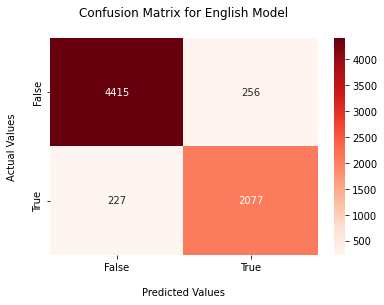

In [ ]:
#Plot confusion matrix
eng_cm = sns.heatmap(eng_matrix, annot = True, cmap = 'Reds', fmt="d")

eng_cm.set_title('Confusion Matrix for English Model\n')
eng_cm.set_xlabel('\nPredicted Values')
eng_cm.set_ylabel('Actual Values\n')
eng_cm.xaxis.set_ticklabels(['False', 'True'])
eng_cm.yaxis.set_ticklabels(['False', 'True'])
plt.show()

## Malay Model

In [ ]:
#Set seed to ensure reproducibility
set_seed(7)

In [ ]:
#Finding out the average and max word length for train malay dataset
print('Average word length for the Malay train dataset is {0:.0f}.'.format(np.mean(train_mal['text'].apply(lambda x: len(x.split())))))
print('Maximum word length for the Malay train dataset is {0:.0f}.\n'.format(np.max(train_mal['text'].apply(lambda x: len(x.split())))))

#Finding out the average and max word length for validation malay dataset
print('Average word length for the Malay validation dataset is {0:.0f}.'.format(np.mean(val_mal['text'].apply(lambda x: len(x.split())))))
print('Maximum word length for the Malay validation dataset is {0:.0f}.'.format(np.max(val_mal['text'].apply(lambda x: len(x.split())))))

Average word length for the Malay train dataset is 19.
Maximum word length for the Malay train dataset is 247.

Average word length for the Malay validation dataset is 19.
Maximum word length for the Malay validation dataset is 224.


Text(0.5, 1.0, 'Distribution of text length in words (training dataset)')

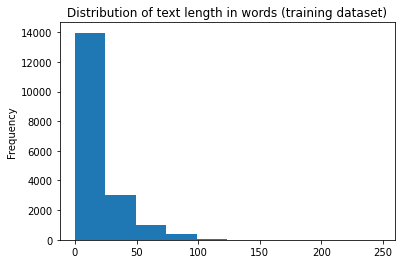

In [ ]:
#Plotting distribution of text length in words in training dataset
train_mal['text'].apply(lambda x: len(x.split())).plot(kind='hist')
plt.title('Distribution of text length in words (training dataset)')

Text(0.5, 1.0, 'Distribution of text length in words (validation dataset)')

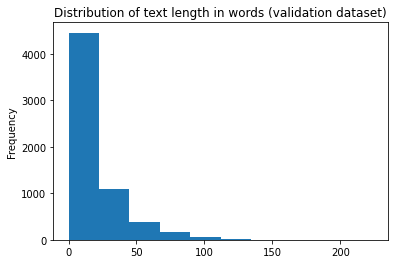

In [ ]:
#Plotting distribution of text length in words in validation dataset
val_mal['text'].apply(lambda x: len(x.split())).plot(kind='hist')
plt.title('Distribution of text length in words (validation dataset)')

In [ ]:
#Choosing pre-trained language model 
mal_model_name = "malay-huggingface/bert-base-bahasa-cased"

#Defining tokenizer 
mal_tokenizer = BertTokenizer.from_pretrained(mal_model_name)

In [ ]:
#Building the Malay models
mal_model_1 = BertForSequenceClassification.from_pretrained(mal_model_name)
mal_model_2 = BertForSequenceClassification.from_pretrained(mal_model_name)
mal_model_3 = BertForSequenceClassification.from_pretrained(mal_model_name)
mal_model_4 = BertForSequenceClassification.from_pretrained(mal_model_name)

Some weights of the model checkpoint at malay-huggingface/bert-base-bahasa-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at mala

In [ ]:
#Tokenizing text with defined bert tokenizer
x_train_mal = mal_tokenizer(x_train_mal, padding=True, truncation=True, max_length=100)
x_val_mal = mal_tokenizer(x_val_mal, padding=True, truncation=True, max_length=100)

In [ ]:
#Converting train and validation dataset to torch dataset
train_mal_ds = Dataset(x_train_mal, y_train_mal)
val_mal_ds = Dataset(x_val_mal, y_val_mal)

### Malay Model 1 (learning rate = 2e-5, batch size = 16)

In [ ]:
#Defining arguments for training Malay model 1 using learning rate = 2e-5 and batch size = 16
args_1 = TrainingArguments(
    output_dir="Checkpoints/mal_model_1",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    num_train_epochs=3,
    seed=7,
)

In [ ]:
#Defining trainer to train Malay model 1
trainer_1 = Trainer(
    model=mal_model_1,
    args=args_1,
    train_dataset=train_mal_ds,
    eval_dataset=val_mal_ds,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer_1.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.384137,0.324334,0.867468,0.896842,0.830409,0.862348
1000,0.338949,0.338640,0.871528,0.864753,0.880767,0.872686
1500,0.287762,0.342992,0.865032,0.894626,0.827485,0.859747
2000,0.257734,0.339153,0.868605,0.921277,0.806043,0.859816
2500,0.229401,0.374896,0.873153,0.872527,0.873944,0.873235
3000,0.186618,0.413724,0.874452,0.900591,0.841780,0.870193


TrainOutput(global_step=3465, training_loss=0.26712160316896644)

In [ ]:
#Evaluate performance of Malay model 1
trainer_1.evaluate()

{'eval_loss': 0.4163171947002411,
 'eval_accuracy': 0.8755887607601105,
 'eval_precision': 0.8810151615029663,
 'eval_recall': 0.868421052631579,
 'eval_f1': 0.8746727748691099,
 'epoch': 3.0}

In [ ]:
#Saving Malay model 1
model_path = "Models/Malay Model 1"
mal_model_1.save_pretrained(model_path)

### Malay Model 2 (learning rate = 3e-5, batch size = 16)

In [ ]:
#Defining arguments for training Malay model 2 using learning rate = 3e-5 and batch size = 16
args_2 = TrainingArguments(
    output_dir="Checkpoints/mal_model_2",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=3e-5,
    num_train_epochs=3,
    seed=7,
)

In [ ]:
#Defining trainer to train Malay model 2
trainer_2 = Trainer(
    model=mal_model_2,
    args=args_2,
    train_dataset=train_mal_ds,
    eval_dataset=val_mal_ds,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer_2.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.392326,0.320104,0.866169,0.879461,0.848603,0.863757
1000,0.345735,0.351590,0.870229,0.862321,0.881092,0.871605
1500,0.295622,0.335100,0.866493,0.891667,0.834308,0.862034
2000,0.260879,0.345664,0.868930,0.923220,0.804743,0.859920
2500,0.235811,0.367485,0.874127,0.868716,0.881417,0.875020
3000,0.194997,0.410506,0.876726,0.891855,0.857375,0.874275


TrainOutput(global_step=3465, training_loss=0.27367619766301404)

In [ ]:
#Evaluate performance of Malay model 2
trainer_2.evaluate()

{'eval_loss': 0.417342871427536,
 'eval_accuracy': 0.8760760110443397,
 'eval_precision': 0.8776508972267537,
 'eval_recall': 0.8739441195581547,
 'eval_f1': 0.8757935861956699,
 'epoch': 3.0}

In [ ]:
#Saving Malay model 2
model_path = "Models/Malay Model 2"
mal_model_2.save_pretrained(model_path)

### Malay Model 3 (learning rate = 2e-5, batch size = 32)

In [ ]:
#Defining arguments for training Malay model 3 using learning rate = 2e-5 and batch size = 32
args_3 = TrainingArguments(
    output_dir="Checkpoints/mal_model_3",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    num_train_epochs=3,
    seed=7,
)

In [ ]:
#Defining trainer to train Malay model 3
trainer_3 = Trainer(
    model=mal_model_3,
    args=args_3,
    train_dataset=train_mal_ds,
    eval_dataset=val_mal_ds,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer_3.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.362858,0.336633,0.869092,0.865744,0.873619,0.869664
1000,0.268692,0.325184,0.872665,0.906449,0.831059,0.867119
1500,0.211095,0.342608,0.872178,0.879682,0.862248,0.870878


TrainOutput(global_step=1734, training_loss=0.2656593894738502)

In [ ]:
#Evaluate performance of Malay model 3
trainer_3.evaluate()

{'eval_loss': 0.3537110984325409,
 'eval_accuracy': 0.8725028422933246,
 'eval_precision': 0.8757784333005572,
 'eval_recall': 0.8680961663417803,
 'eval_f1': 0.8719203785283081,
 'epoch': 3.0}

In [ ]:
#Saving Malay model 3
model_path = "Models/Malay Model 3"
mal_model_3.save_pretrained(model_path)

### Malay Model 4 (learning rate = 3e-5, batch size = 32)

In [ ]:
#Defining arguments for training Malay model 4 using learning rate = 3e-5 and batch size = 32
args_4 = TrainingArguments(
    output_dir="Checkpoints/mal_model_4",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=3e-5,
    num_train_epochs=3,
    seed=7,
)

In [ ]:
#Defining trainer to train Malay model 3
trainer_4 = Trainer(
    model=mal_model_4,
    args=args_4,
    train_dataset=train_mal_ds,
    eval_dataset=val_mal_ds,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer_4.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.363788,0.337190,0.863732,0.857097,0.872969,0.864961
1000,0.268060,0.329789,0.873153,0.905974,0.832684,0.867784
1500,0.201866,0.364093,0.871366,0.872798,0.869396,0.871094


TrainOutput(global_step=1734, training_loss=0.26180435409457903)

In [ ]:
#Evaluate performance of Malay model 4
trainer_4.evaluate()

{'eval_loss': 0.37207895517349243,
 'eval_accuracy': 0.8721780087705051,
 'eval_precision': 0.8759435510338037,
 'eval_recall': 0.8671215074723847,
 'eval_f1': 0.8715102040816327,
 'epoch': 3.0}

In [ ]:
#Saving Malay model 4
model_path = "Models/Malay Model 4"
mal_model_4.save_pretrained(model_path)

### Predicting test data

In [ ]:
#Tokenizing test data using predefined tokenizer
x_test_mal = mal_tokenizer(x_test_mal, padding=True, truncation=True, max_length=100)

In [ ]:
#Converting test data into torch dataset
test_mal_ds = Dataset(x_test_mal, y_test_mal)

In [ ]:
#Loading best performing model (Malay model 3)
malay_model_path = "Models/Malay Model 3"
model = BertForSequenceClassification.from_pretrained(malay_model_path) 

In [ ]:
#Defining trainer for test data
test_trainer = Trainer(model) 

#Predicting test data
raw_pred, _, _ = test_trainer.predict(test_mal_ds) 

In [ ]:
#Changing shape of raw prediction
y_pred = np.argmax(raw_pred, axis=1)

In [ ]:
#Generating evaluation metrics
print('Accuracy for Malay model is: ',accuracy_score(y_test_mal, y_pred))
print('Precision for Malay model is: ',precision_score(y_test_mal,y_pred))
print('Recall for Malay model is: ',recall_score(y_test_mal,y_pred))
print('F-1 score for Malay model is: ',f1_score(y_test_mal,y_pred))

Accuracy for Malay model is:  0.8731525093389638
Precision for Malay model is:  0.8742671009771987
Recall for Malay model is:  0.8717115946735953
F-1 score for Malay model is:  0.8729874776386405


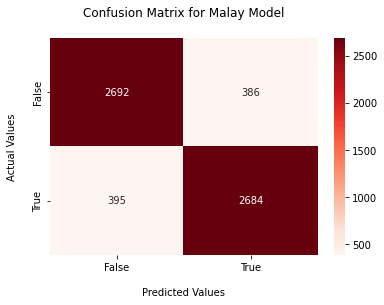

In [ ]:
#Plot confusion matrix
mal_cm = sns.heatmap(mal_matrix, annot = True, cmap = 'Reds', fmt="d")

mal_cm.set_title('Confusion Matrix for Malay Model\n')
mal_cm.set_xlabel('\nPredicted Values')
mal_cm.set_ylabel('Actual Values\n')
mal_cm.xaxis.set_ticklabels(['False', 'True'])
mal_cm.yaxis.set_ticklabels(['False', 'True'])
plt.show()

In [ ]:
#Generating confusion matrix
mal_matrix = confusion_matrix(y_test_mal, y_pred)

#Displaying confusion matrix
mal_matrix

array([[2692,  386],
       [ 395, 2684]])

## Multilingual Model

In [ ]:
#Combining English and Malay dataset
train_multi = train_eng.append(train_mal)
val_multi = val_eng.append(val_mal)
test_multi = test_eng.append(test_mal)

In [ ]:
#Separating features and target variable in train, test and validation datasets
x_train_multi = list(train_multi['text'])
y_train_multi = list(train_multi['class'])

x_val_multi = list(val_multi['text'])
y_val_multi = list(val_multi['class'])

x_test_multi = list(test_multi['text'])
y_test_multi = list(test_multi['class'])

In [ ]:
#Set seed to ensure reproducibility
set_seed(7)

In [ ]:
#Finding out the average and max word length for train multilingual dataset
print('Average word length for the multilingual train dataset is {0:.0f}.'.format(np.mean(train_multi['text'].apply(lambda x: len(x.split())))))
print('Maximum word length for the multilingual train dataset is {0:.0f}.\n'.format(np.max(train_multi['text'].apply(lambda x: len(x.split())))))

#Finding out the average and max word length for validation multilingual dataset
print('Average word length for the multilingual validation dataset is {0:.0f}.'.format(np.mean(val_multi['text'].apply(lambda x: len(x.split())))))
print('Maximum word length for the multilingual validation dataset is {0:.0f}.'.format(np.max(val_multi['text'].apply(lambda x: len(x.split())))))

Average word length for the multilingual train dataset is 13.
Maximum word length for the multilingual train dataset is 247.

Average word length for the multilingual validation dataset is 13.
Maximum word length for the multilingual validation dataset is 224.


Text(0.5, 1.0, 'Distribution of text length in words (training dataset)')

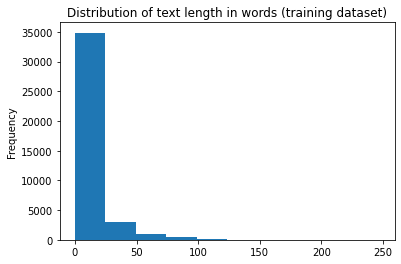

In [ ]:
#Plotting distribution of text length in words in training dataset
train_multi['text'].apply(lambda x: len(x.split())).plot(kind='hist')
plt.title('Distribution of text length in words (training dataset)')

Text(0.5, 1.0, 'Distribution of text length in words (validation dataset)')

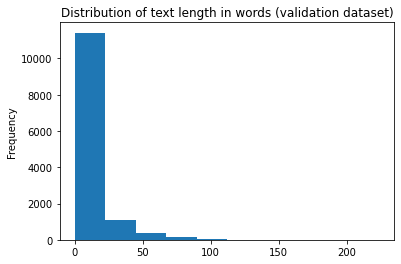

In [ ]:
#Plotting distribution of text length in words in validation dataset
val_multi['text'].apply(lambda x: len(x.split())).plot(kind='hist')
plt.title('Distribution of text length in words (validation dataset)')

In [ ]:
#Choosing pre-trained language model 
multi_model_name = "bert-base-multilingual-uncased"

#Defining tokenizer 
multi_tokenizer = BertTokenizer.from_pretrained(multi_model_name)

In [ ]:
#Building the Malay models
multi_model_1 = BertForSequenceClassification.from_pretrained(multi_model_name)
multi_model_2 = BertForSequenceClassification.from_pretrained(multi_model_name)
multi_model_3 = BertForSequenceClassification.from_pretrained(multi_model_name)
multi_model_4 = BertForSequenceClassification.from_pretrained(multi_model_name)

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

In [ ]:
#Tokenizing text with defined bert tokenizer
x_train_multi = multi_tokenizer(x_train_multi, padding=True, truncation=True, max_length=100)
x_val_multi = multi_tokenizer(x_val_multi, padding=True, truncation=True, max_length=100)

In [ ]:
#Converting train and validation dataset to torch dataset
train_multi_ds = Dataset(x_train_multi, y_train_multi)
val_multi_ds = Dataset(x_val_multi, y_val_multi)

### Multilingual Model 1 (learning rate = 2e-5, batch size = 16)

In [ ]:
#Defining arguments for training multilingual model 1 using learning rate = 2e-5 and batch size = 16
args_1 = TrainingArguments(
    output_dir="Checkpoints/multi_model_1",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    num_train_epochs=3,
    seed=7,
)

In [ ]:
#Defining trainer to train multilingual model 1
trainer_1 = Trainer(
    model=multi_model_1,
    args=args_1,
    train_dataset=train_multi_ds,
    eval_dataset=val_multi_ds,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer_1.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.400654,0.351180,0.856142,0.771238,0.922705,0.840200
1000,0.317854,0.294203,0.886223,0.890205,0.824043,0.855847
1500,0.300721,0.350275,0.891630,0.842771,0.904311,0.872457
2000,0.294148,0.256110,0.903130,0.880838,0.883129,0.881982
2500,0.277527,0.262808,0.903206,0.903752,0.854887,0.878640
3000,0.245446,0.312233,0.902749,0.872843,0.892791,0.882704
3500,0.245925,0.292149,0.906709,0.908912,0.858417,0.882943
4000,0.230172,0.303938,0.906329,0.879525,0.893906,0.886657
4500,0.235648,0.292493,0.905719,0.890501,0.877926,0.884169
5000,0.208555,0.308459,0.907547,0.881965,0.894091,0.887987


TrainOutput(global_step=7386, training_loss=0.2476901672346754)

In [ ]:
#Evaluate performance of multilingual model 1
trainer_1.evaluate()

{'eval_loss': 0.3218161165714264,
 'eval_accuracy': 0.9067854694996573,
 'eval_precision': 0.8875838926174496,
 'eval_recall': 0.8846153846153846,
 'eval_f1': 0.8860971524288107,
 'epoch': 3.0}

In [ ]:
#Saving multilingual model 1
model_path = "Models/Multilingual Model 1"
multi_model_1.save_pretrained(model_path)

### Multilingual Model 2 (learning rate = 3e-5, batch size = 16)

In [ ]:
#Defining arguments for training multilingual model 2 using learning rate = 3e-5 and batch size = 16
args_2 = TrainingArguments(
    output_dir="Checkpoints/multi_model_2",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=3e-5,
    num_train_epochs=3,
    seed=7,
)

In [ ]:
#Defining trainer to train multilingual model 2
trainer_2 = Trainer(
    model=multi_model_2,
    args=args_2,
    train_dataset=train_multi_ds,
    eval_dataset=val_multi_ds,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer_2.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.404459,0.363228,0.844642,0.760768,0.905797,0.826972
1000,0.323355,0.329817,0.881121,0.914156,0.783538,0.843822
1500,0.313009,0.334565,0.892849,0.860904,0.880899,0.870787
2000,0.304458,0.270338,0.900312,0.868998,0.891119,0.879919
2500,0.286137,0.258804,0.903815,0.905653,0.854329,0.879243
3000,0.247336,0.302972,0.904653,0.883259,0.884244,0.883751
3500,0.251114,0.289797,0.899855,0.918158,0.829617,0.871645
4000,0.231991,0.337294,0.897114,0.854280,0.903010,0.877969
4500,0.246526,0.274209,0.904729,0.897288,0.866778,0.881769
5000,0.215211,0.315979,0.906633,0.880307,0.893720,0.886963


TrainOutput(global_step=7386, training_loss=0.2534934156734447)

In [ ]:
#Evaluate performance of multilingual model 2
trainer_2.evaluate()

{'eval_loss': 0.3196714520454407,
 'eval_accuracy': 0.9060239128779225,
 'eval_precision': 0.8797143903332113,
 'eval_recall': 0.8927907840951319,
 'eval_f1': 0.8862043526374033,
 'epoch': 3.0}

In [ ]:
#Saving multilingual model 2
model_path = "Models/Multilingual Model 2"
multi_model_2.save_pretrained(model_path)

### Multilingual Model 3 (learning rate = 2e-5, batch size = 32)

In [ ]:
#Defining arguments for training multilingual model 3 using learning rate = 2e-5 and batch size = 32
args_3 = TrainingArguments(
    output_dir="Checkpoints/multi_model_3",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    num_train_epochs=3,
    seed=7,
)

In [ ]:
#Defining trainer to train multilingual model 3
trainer_3 = Trainer(
    model=multi_model_3,
    args=args_3,
    train_dataset=train_multi_ds,
    eval_dataset=val_multi_ds,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer_3.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.356135,0.288645,0.886757,0.874447,0.845039,0.859492
1000,0.290948,0.262994,0.900312,0.862689,0.900037,0.880968
1500,0.250307,0.268910,0.902597,0.861498,0.908398,0.884327
2000,0.230839,0.261222,0.901759,0.861996,0.905240,0.883089
2500,0.216821,0.259144,0.908385,0.881365,0.897250,0.889237
3000,0.182867,0.264902,0.908385,0.897319,0.876812,0.886947
3500,0.167112,0.282998,0.907319,0.881620,0.893906,0.887720


TrainOutput(global_step=3693, training_loss=0.2388316902596551)

In [ ]:
#Evaluate performance of multilingual model 3
trainer_3.evaluate()

{'eval_loss': 0.27520260214805603,
 'eval_accuracy': 0.9080039600944331,
 'eval_precision': 0.8864814814814815,
 'eval_recall': 0.8894463024897807,
 'eval_f1': 0.8879614171767761,
 'epoch': 3.0}

In [ ]:
#Saving multilingual model 3
model_path = "Models/Multilingual Model 3"
multi_model_3.save_pretrained(model_path)

### Multilingual Model 4 (learning rate = 3e-5, batch size = 32)

In [ ]:
#Defining arguments for training multilingual model 4 using learning rate = 3e-5 and batch size = 32
args_4 = TrainingArguments(
    output_dir="Checkpoints/multi_model_4",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=3e-5,
    num_train_epochs=3,
    seed=7,
)

In [ ]:
#Defining trainer to train multilingual model 4
trainer_4 = Trainer(
    model=multi_model_4,
    args=args_4,
    train_dataset=train_multi_ds,
    eval_dataset=val_multi_ds,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer_4.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.351818,0.297987,0.882720,0.870849,0.838164,0.854194
1000,0.290968,0.265544,0.895971,0.851049,0.904496,0.876959
1500,0.250726,0.266486,0.902902,0.867550,0.900595,0.883763
2000,0.226801,0.258196,0.903663,0.871637,0.897064,0.884168
2500,0.212723,0.268659,0.906329,0.873247,0.902453,0.887610
3000,0.171318,0.278773,0.906557,0.890581,0.880156,0.885338
3500,0.157170,0.287895,0.906709,0.884836,0.887960,0.886395


TrainOutput(global_step=3693, training_loss=0.23368187993966627)

In [ ]:
#Evaluate performance of multilingual model 4
trainer_4.evaluate()

{'eval_loss': 0.2789528965950012,
 'eval_accuracy': 0.906252379864443,
 'eval_precision': 0.8854224698235841,
 'eval_recall': 0.885916016350799,
 'eval_f1': 0.8856691743289682,
 'epoch': 3.0}

In [ ]:
#Saving multilingual model 4
model_path = "Models/Multilingual Model 4"
multi_model_4.save_pretrained(model_path)

### Predicting test data

In [ ]:
#Loading best performing model (multilingual model 3)
multi_model_path = "Models/Multilingual Model 3"
model = BertForSequenceClassification.from_pretrained(multi_model_path) 

In [ ]:
#Defining trainer for test data
test_trainer = Trainer(model) 

#### English test data

In [ ]:
#Tokenizing english text with multilingual bert tokenizer
x_test_eng = multi_tokenizer(x_test_eng, padding=True, truncation=True, max_length=100)

In [ ]:
#Converting english test dataset to torch dataset
test_eng_ds = Dataset(x_test_eng, y_test_eng)

In [ ]:
#Predicting English test data
raw_pred, _, _ = test_trainer.predict(test_eng_ds) 

In [ ]:
#Changing shape of raw prediction
y_pred = np.argmax(raw_pred, axis=1)

In [ ]:
#Generating evaluation metrics
print('Accuracy of multilingual model for English test data is: ',accuracy_score(y_test_eng, y_pred))
print('Precision for multilingual model for English test data is: ',precision_score(y_test_eng,y_pred))
print('Recall for multilingual model for English test data is: ',recall_score(y_test_eng,y_pred))
print('F-1 score for multilingual model for English test data is: ',f1_score(y_test_eng,y_pred))

Accuracy of multilingual model for English test data is:  0.9314695340501792
Precision for multilingual model for English test data is:  0.8772727272727273
Recall for multilingual model for English test data is:  0.9214409722222222
F-1 score for multilingual model for English test data is:  0.8988145639288738


In [ ]:
#Generating confusion matrix
multi_matrix_1 = confusion_matrix(y_test_eng, y_pred)

#Displaying confusion matrix
multi_matrix_1

array([[4374,  297],
       [ 181, 2123]])

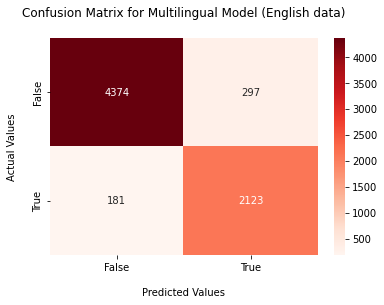

In [ ]:
#Plot confusion matrix
multi_cm_1 = sns.heatmap(multi_matrix_1, annot = True, cmap = 'Reds', fmt="d")

multi_cm_1.set_title('Confusion Matrix for Multilingual Model (English data)\n')
multi_cm_1.set_xlabel('\nPredicted Values')
multi_cm_1.set_ylabel('Actual Values\n')
multi_cm_1.xaxis.set_ticklabels(['False', 'True'])
multi_cm_1.yaxis.set_ticklabels(['False', 'True'])
plt.show()

#### Malay test data

In [ ]:
#Tokenizing malay text with multilingual bert tokenizer
x_test_mal = multi_tokenizer(x_test_mal, padding=True, truncation=True, max_length=100)

In [ ]:
#Converting malay test dataset to torch dataset
test_mal_ds = Dataset(x_test_mal, y_test_mal)

In [ ]:
#Predicting Malay test data
raw_pred, _, _ = test_trainer.predict(test_mal_ds) 

In [ ]:
#Changing shape of raw prediction
y_pred = np.argmax(raw_pred, axis=1)

In [ ]:
#Generating evaluation metrics
print('Accuracy of multilingual model for Malay test data is: ',accuracy_score(y_test_mal, y_pred))
print('Precision for multilingual model for Malay test data is: ',precision_score(y_test_mal,y_pred))
print('Recall for multilingual model for Malay test data is: ',recall_score(y_test_mal,y_pred))
print('F-1 score for multilingual model for Malay test data is: ',f1_score(y_test_mal,y_pred))

Accuracy of multilingual model for Malay test data is:  0.871528341724866
Precision for multilingual model for Malay test data is:  0.8741007194244604
Recall for multilingual model for Malay test data is:  0.8681390061708347
F-1 score for multilingual model for Malay test data is:  0.8711096627016458


In [ ]:
#Generating confusion matrix
multi_matrix_2 = confusion_matrix(y_test_mal, y_pred)

#Displaying confusion matrix
multi_matrix_2

array([[2693,  385],
       [ 406, 2673]])

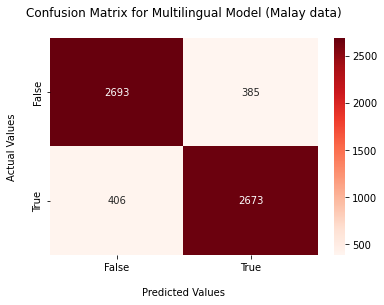

In [ ]:
#Plot confusion matrix
multi_cm_2 = sns.heatmap(multi_matrix_2, annot = True, cmap = 'Reds', fmt="d")

multi_cm_2.set_title('Confusion Matrix for Multilingual Model (Malay data)\n')
multi_cm_2.set_xlabel('\nPredicted Values')
multi_cm_2.set_ylabel('Actual Values\n')
multi_cm_2.xaxis.set_ticklabels(['False', 'True'])
multi_cm_2.yaxis.set_ticklabels(['False', 'True'])
plt.show()

# Evaluating the results 

## Plotting loss data

### English Model (model 3)

In [ ]:
#Initializing data with dictionary of lists
data = {'Train Loss' :[0.263434, 0.191424, 0.163703], 
        'Validation Loss' :[0.211101, 0.194055, 0.216040]}

#Converting dictionary to pandas dataframe
eng_loss = pd.DataFrame(data, index = range(500, 1501, 500))

([<matplotlib.axis.XTick at 0x7fe3a913ec50>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

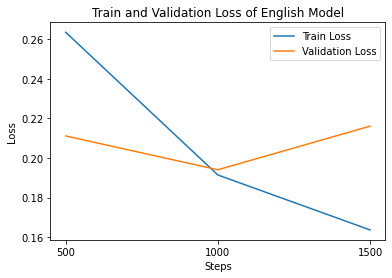

In [ ]:
eng_loss.plot()
plt.title('Train and Validation Loss of English Model')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.xticks(range(500, 1501, 500))

### Malay Model (model 3)

In [ ]:
#Initializing data with dictionary of lists
data = {'Train Loss' :[0.362858, 0.268692, 0.211095], 
        'Validation Loss' :[0.336633, 0.325184, 0.342608]}

#Converting dictionary to pandas dataframe
mal_loss = pd.DataFrame(data, index = range(500, 1501, 500))

([<matplotlib.axis.XTick at 0x7fe3a9096828>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

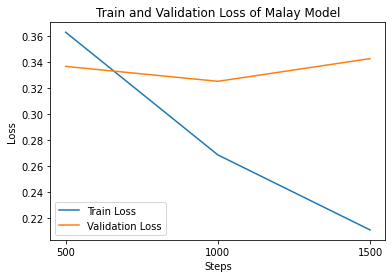

In [ ]:
mal_loss.plot()
plt.title('Train and Validation Loss of Malay Model')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.xticks(range(500, 1501, 500))

### Multilingual model (model 3)

In [ ]:
#Initializing data with dictionary of lists
data = {'Train Loss' :[0.356135, 0.290948, 0.250307, 0.230839, 0.216821, 0.182867, 0.167112], 
        'Validation Loss' :[0.288645, 0.262994, 0.268910, 0.261222, 0.259144, 0.264902, 0.282998]}

#Converting dictionary to pandas dataframe
multi_loss = pd.DataFrame(data, index = range(500, 3501, 500))

([<matplotlib.axis.XTick at 0x7f99564e3080>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

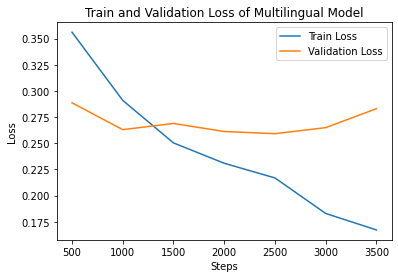

In [ ]:
multi_loss.plot()
plt.title('Train and Validation Loss of Multilingual Model')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.xticks(range(500, 3501, 500))